# Fashion MNIST with PyTorch

It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://github.com/PabloRR100/intro_deep_learning/blob/Torch/class/Fundamentals/torch/01_Fashion_MNIST_FCNNs.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/PabloRR100/intro_deep_learning/blob/Torch/class/Fundamentals/torch/01_Fashion_MNIST_FCNNs.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Fashion MNIST with PyTorch

# Fashion MNIST with PyTorch

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

## Load Dataset

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",  # where to download data to?
    train=True,  # get training data
    download=True,  # download data if it doesn't exist on disk
    transform=ToTensor(),  # images come as PIL format, we want to turn into Torch tensors
    target_transform=None  # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,  # get test data
    download=True,
    transform=ToTensor()
)

In [ ]:
# What's the shape of the image?# See first training sample
image, label = train_data[0]

In [ ]:
# image, label

In [ ]:
image.shape


In [ ]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

In [ ]:
# See classes
class_names = train_data.classes
class_names

In [ ]:
# Visualize some training data
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())  # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

## Prepare a DataLoader

In [10]:
from torch.utils.data import DataLoader

In [11]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data,  # dataset to turn into iterable
    batch_size=BATCH_SIZE,  # how many samples per batch? 
    shuffle=True  # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False  # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x13d1b6d90>, <torch.utils.data.dataloader.DataLoader object at 0x13d196a10>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [12]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


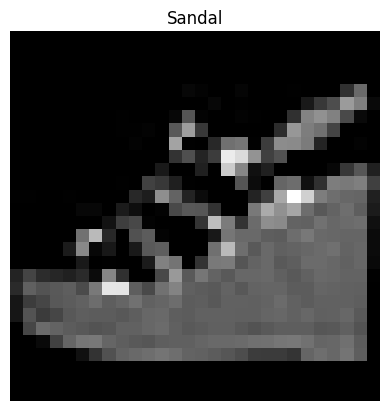

In [13]:
# Check out what's inside the testing dataloader
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# Create the Models

In [14]:
# Create a flatten layer
flatten_model = nn.Flatten()  # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)  # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [34]:
from torch import nn


class FashionMNISTModelV0(nn.Module):
    """
    Model that is only a sequence of Linear layers. 
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [35]:
# Automatically detect device (cpu, gpu or mps)
# DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# Fix to CPU for the moment: 
DEVICE = "cpu"

print(f"Using device: {DEVICE}")

Using device: cpu


In [36]:
torch.manual_seed(42)

# Need to set up model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,  # one for every pixel (28x28)
    hidden_units=10,  # how many units in the hidden layer
    output_shape=len(class_names)  # one for every class
)

In [37]:
model_0.to(DEVICE)  # keep model on CPU to begin with

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [38]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()  # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [39]:
def accuracy_fn(y_true, y_pred):
    """
    Calculates accuracy between predictions and true labels.
    """
    correct = torch.eq(y_true, y_pred).sum().item()  # sum up all the correct predictions
    acc = (correct / len(y_pred)) * 100  # divide by number of predictions
    return acc

Compute initial accuracy -> How much do we expect? 

In [40]:
def compute_accuracy_in_full_subset(
    model: nn.Module,
    dataloader: DataLoader
):
    """
    Computes the accuracy over an entire subset
    """""
    # P
    model.eval()
    acc = 0
    with torch.inference_mode():
        for X, y in dataloader:
            # 1. Forward pass
            preds = model(X)
            acc += accuracy_fn(y_true=y, y_pred=preds.argmax(dim=1))

        # Divide total accuracy by length of test dataloader (per batch)
        acc /= len(test_dataloader)
    return acc


test_acc = compute_accuracy_in_full_subset(model=model_0, dataloader=test_dataloader)
print(f"Initial Test Accuracy: {test_acc}")

Initial Test Accuracy: 10.852635782747603


In [41]:
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss  # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y)  # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%



## Create better models with Non-Linearities

In [26]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)


In [42]:
# We can move the device to "mps", "gpu" or "cpu"
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [43]:
# Since we are going to be creating more models, we'll create a function to help us do that
from helpers import eval_model

In [44]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape=784,  # number of input features
    hidden_units=10,
    output_shape=len(class_names)  # number of output classes desired
).to(DEVICE)  # send model to GPU if it's available

next(model_1.parameters()).device  # check model device

device(type='mps', index=0)

In [45]:
loss_fn = ...
optimizer = ...

In [46]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = "cpu"
):
    # Complete
    ...


def test_step(
    data_loader: torch.utils.data.DataLoader,
    model: torch.nn.Module,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = "cpu"
):
    # Complete
    ...

In [58]:
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(
        data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.83143 | Train accuracy: 68.60%
Test loss: 0.88264 | Test accuracy: 67.09%

Epoch: 1
---------
Train loss: 0.82675 | Train accuracy: 68.71%
Test loss: 0.87636 | Test accuracy: 67.09%

Epoch: 2
---------
Train loss: 0.82094 | Train accuracy: 68.98%
Test loss: 0.86035 | Test accuracy: 67.95%



In [59]:
# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

In [60]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8603453040122986,
 'model_acc': 67.95127795527156}

In [61]:
# Check baseline results# Calculate model 0 results on test dataset
model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

In [62]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

It looks like we are getting worse results !  
What is happening here ?

## Prevent Overfitting

In [68]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV2(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten inputs into single vector
            nn.BatchNorm1d(num_features=input_shape),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [69]:
model_2 = FashionMNISTModelV2(
    input_shape=784,  # number of input features
    hidden_units=50,
    output_shape=len(class_names)  # number of output classes desired
).to(DEVICE)  #

In [70]:
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(
        data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 2.40255 | Train accuracy: 9.57%
Test loss: 2.42558 | Test accuracy: 9.87%

Epoch: 1
---------
Train loss: 2.42458 | Train accuracy: 9.84%
Test loss: 2.42558 | Test accuracy: 9.87%

Epoch: 2
---------
Train loss: 2.42458 | Train accuracy: 9.84%
Test loss: 2.42558 | Test accuracy: 9.87%

Epoch: 3
---------
Train loss: 2.42458 | Train accuracy: 9.84%
Test loss: 2.42558 | Test accuracy: 9.87%

Epoch: 4
---------
Train loss: 2.42458 | Train accuracy: 9.84%
Test loss: 2.42558 | Test accuracy: 9.87%



### Why is the model not improving ????

In [71]:
optimizer_2 = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [73]:
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer_2,
        accuracy_fn=accuracy_fn
    )
    test_step(
        data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.52026 | Train accuracy: 82.15%
Test loss: 0.43368 | Test accuracy: 84.73%

Epoch: 1
---------
Train loss: 0.35101 | Train accuracy: 87.13%
Test loss: 0.38381 | Test accuracy: 86.30%

Epoch: 2
---------
Train loss: 0.31225 | Train accuracy: 88.53%
Test loss: 0.37009 | Test accuracy: 86.48%

Epoch: 3
---------
Train loss: 0.29098 | Train accuracy: 89.21%
Test loss: 0.35991 | Test accuracy: 87.01%

Epoch: 4
---------
Train loss: 0.27468 | Train accuracy: 89.75%
Test loss: 0.37265 | Test accuracy: 86.83%



In [75]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3726479113101959,
 'model_acc': 86.83107028753993}

## Compare Models

In [80]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.860345,67.951278
2,FashionMNISTModelV2,0.372648,86.831070


Text(0, 0.5, 'model')

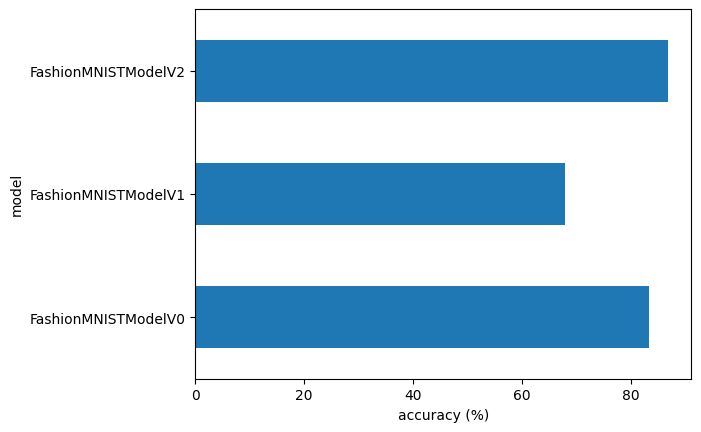

In [81]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

### Create a Confusion Matrix

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(DEVICE), y.to(DEVICE)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)


In [95]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except Exception as e:
    print("Installing missing library")
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

Installing missing library

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


ModuleNotFoundError: No module named 'torchmetrics'

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(
    preds=y_pred_tensor, 
    target=test_data.targets
)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)

In [ ]:
#

## Saving and Loading Models

Let's finish this section off by saving and loading in our best performing model.

We can save and load a PyTorch model using a combination of:
- torch.save - a function to save a whole PyTorch model or a model's state_dict().
- torch.load - a function to load in a saved PyTorch object.
- torch.nn.Module.load_state_dict() - a function to load a saved state_dict() into an existing model instance.
- 
You can see more of these three in the PyTorch saving and loading models documentation.
For now, let's save our model_2's state_dict() then load it back in and evaluate it to make sure the save and load went correctly.

In [84]:
from pathlib import Path

# Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(
    parents=True, # create parent directories if needed
    exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth



Now we've got a saved model state_dict() we can load it back in using a combination of load_state_dict() and torch.load().

Since we're using load_state_dict(), we'll need to create a new instance of FashionMNISTModelV2() with the same input parameters as our saved model state_dict().

In [91]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(
    input_shape=1, 
    hidden_units=10, # try changing this to 128 and seeing what happens 
    output_shape=10
) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(DEVICE)

In [92]:
loaded_model_2


FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [93]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

In [94]:
loaded_model_2_results


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}